# Decision tree 

In [1]:
import os
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from patsy import dmatrices
import statsmodels.api as sm
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.base import TransformerMixin
from sklearn import svm
from sklearn import tree

In [2]:
df = pd.read_csv("C:/Users/Franklin/Documents/PROGRAMA_DATASCIENCE/Modulo 10_ Machine Learning I/Data/bank-additional-full.csv",
                        sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
from sklearn.tree import DecisionTreeClassifier as dt
model = dt(class_weight= 'balanced')

In [6]:
model

DecisionTreeClassifier(class_weight='balanced')

In [7]:
x = df.drop(['y', 'month', 'day_of_week'], axis = 'columns')
y = df['y']

In [8]:
categorical_columns = ['job','marital','education',
                       'default','loan','housing','contact', 'poutcome']

numerical_columns = ['age','previous','cons.price.idx',
                     'cons.conf.idx','euribor3m']

In [9]:
prep = ColumnTransformer([('encoder', OneHotEncoder(sparse=False), categorical_columns), #dummy all nominal
                          ('scaler',StandardScaler(), numerical_columns)], #standarize all numerical
                         remainder="drop"
)

In [10]:
df_prep = prep.fit_transform(x)

In [11]:
prep

ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False),
                                 ['job', 'marital', 'education', 'default',
                                  'loan', 'housing', 'contact', 'poutcome']),
                                ('scaler', StandardScaler(),
                                 ['age', 'previous', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m'])])

In [12]:
prep.get_feature_names_out()

array(['encoder__job_admin.', 'encoder__job_blue-collar',
       'encoder__job_entrepreneur', 'encoder__job_housemaid',
       'encoder__job_management', 'encoder__job_retired',
       'encoder__job_self-employed', 'encoder__job_services',
       'encoder__job_student', 'encoder__job_technician',
       'encoder__job_unemployed', 'encoder__job_unknown',
       'encoder__marital_divorced', 'encoder__marital_married',
       'encoder__marital_single', 'encoder__marital_unknown',
       'encoder__education_basic.4y', 'encoder__education_basic.6y',
       'encoder__education_basic.9y', 'encoder__education_high.school',
       'encoder__education_illiterate',
       'encoder__education_professional.course',
       'encoder__education_university.degree',
       'encoder__education_unknown', 'encoder__default_no',
       'encoder__default_unknown', 'encoder__default_yes',
       'encoder__loan_no', 'encoder__loan_unknown', 'encoder__loan_yes',
       'encoder__housing_no', 'encoder__housing_u

In [13]:
columns_prep = []
for word in prep.get_feature_names_out():
    if 'encoder_' in word:
        columns_prep.append(word.replace('encoder__', ''))
    if 'scaler_' in word:
        columns_prep.append(word.replace('scaler__', ''))    


In [14]:
x_2 = pd.DataFrame(df_prep, columns=columns_prep)

In [15]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_2,y, test_size=0.2,
                                                    random_state=123,stratify= df['y'])

In [16]:
x_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,age,previous,cons.price.idx,cons.conf.idx,euribor3m
14423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-1.153816,-0.349494,0.591424,-0.474791,0.772422
7079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.093650,-0.349494,0.722722,0.886447,0.714190
40787,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.674021,-0.349494,1.076883,0.648770,-1.581094
35130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.578062,-0.349494,-1.179380,-1.231034,-1.367190
7515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,-1.153816,-0.349494,0.722722,0.886447,0.716496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27096,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,-1.057857,1.671136,-0.649003,-0.323542,0.230456
35500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.573445,-0.349494,-1.179380,-1.231034,-1.370650
8622,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.533034,-0.349494,1.536429,-0.280328,0.716496
4100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.482104,-0.349494,0.722722,0.886447,0.713036


Ahora que ya tenemos el x_train pre-procesado, estrateficado y listo, hacemos una estrategia de cross-validation

Lo interesante es que la función cross_val_score me da el valor de la métrica a ser probada en la cross-validación. Es decir, si pongo scoring="accuracy" me va a dar el valor de esta métrica en cada uno de los folds de la cross-validation

In [17]:
scores = cross_val_score(model,x_train, y_train, cv=5, scoring='accuracy')

In [18]:
scores

array([0.83899848, 0.83581184, 0.84066768, 0.83566009, 0.83657056])

In [19]:
scores.mean() #me da la media del accuracy considerando todos los folds

0.8375417298937784

### Busqueda de Hiper parametros

In [20]:
parameters = {
    'max_depth':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[300,500],
    'criterion':['gini']
}


parameters2 = {
"min_samples_split" : [300, 500],
"ccp_alpha" : [0.01, 0.001, 0.0001] }

In [21]:
search_obj = GridSearchCV(model, parameters2, cv=5, n_jobs=-1, scoring='f1_macro')
fit_obj = search_obj.fit(x_train, y_train)
print(fit_obj.cv_results_['mean_test_score'])

#Por cada valor de la malla, me genera un modelo
#En cada modelo hace cross validation, 5 veces
#Al final me muestra el valor de la media de la metrica f1_macro de cada fold del cv

#En conclusion, los valores vistos son la media del f1_macro, para cada malla de busqueda, al final nos quedamos con el mejor


[0.60410381 0.60410381 0.67716742 0.67716742 0.64796416 0.66275697]


In [22]:
best_model = fit_obj.best_estimator_
best_model

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       min_samples_split=300)

In [23]:
scores_final = cross_val_score(best_model,x_train, y_train, cv=5, scoring='f1_macro' )
scores_final.mean()

0.6771674239058596

In [24]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       min_samples_split=300)

In [25]:
metrics.accuracy_score(y_train, best_model.predict(x_train))

0.8271016691957511

In [26]:
print( classification_report(y_train, best_model.predict(x_train)) )

              precision    recall  f1-score   support

          no       0.95      0.85      0.90     29238
         yes       0.35      0.64      0.46      3712

    accuracy                           0.83     32950
   macro avg       0.65      0.75      0.68     32950
weighted avg       0.88      0.83      0.85     32950



In [27]:
print( classification_report(y_test, best_model.predict(x_test)) )

              precision    recall  f1-score   support

          no       0.95      0.86      0.90      7310
         yes       0.36      0.63      0.45       928

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



In [28]:
from sklearn.tree import export_graphviz
import graphviz

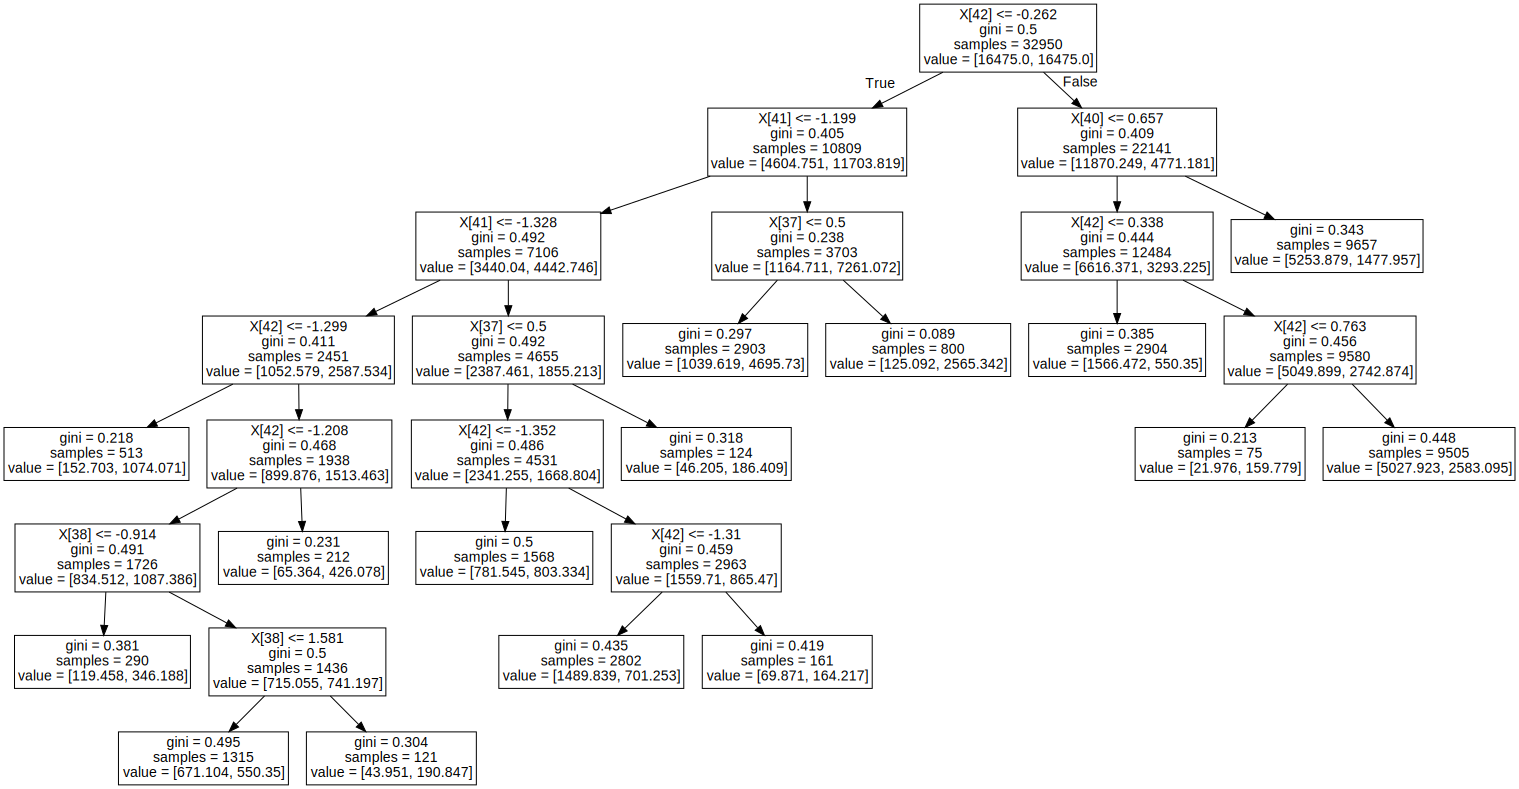

In [29]:
export_graphviz(best_model, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [30]:
labels= np.concatenate( [ prep.named_transformers_['encoder'].get_feature_names(categorical_columns) , 
                       numerical_columns ] )
labels

C:\Users\Franklin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m'], dtype=object)

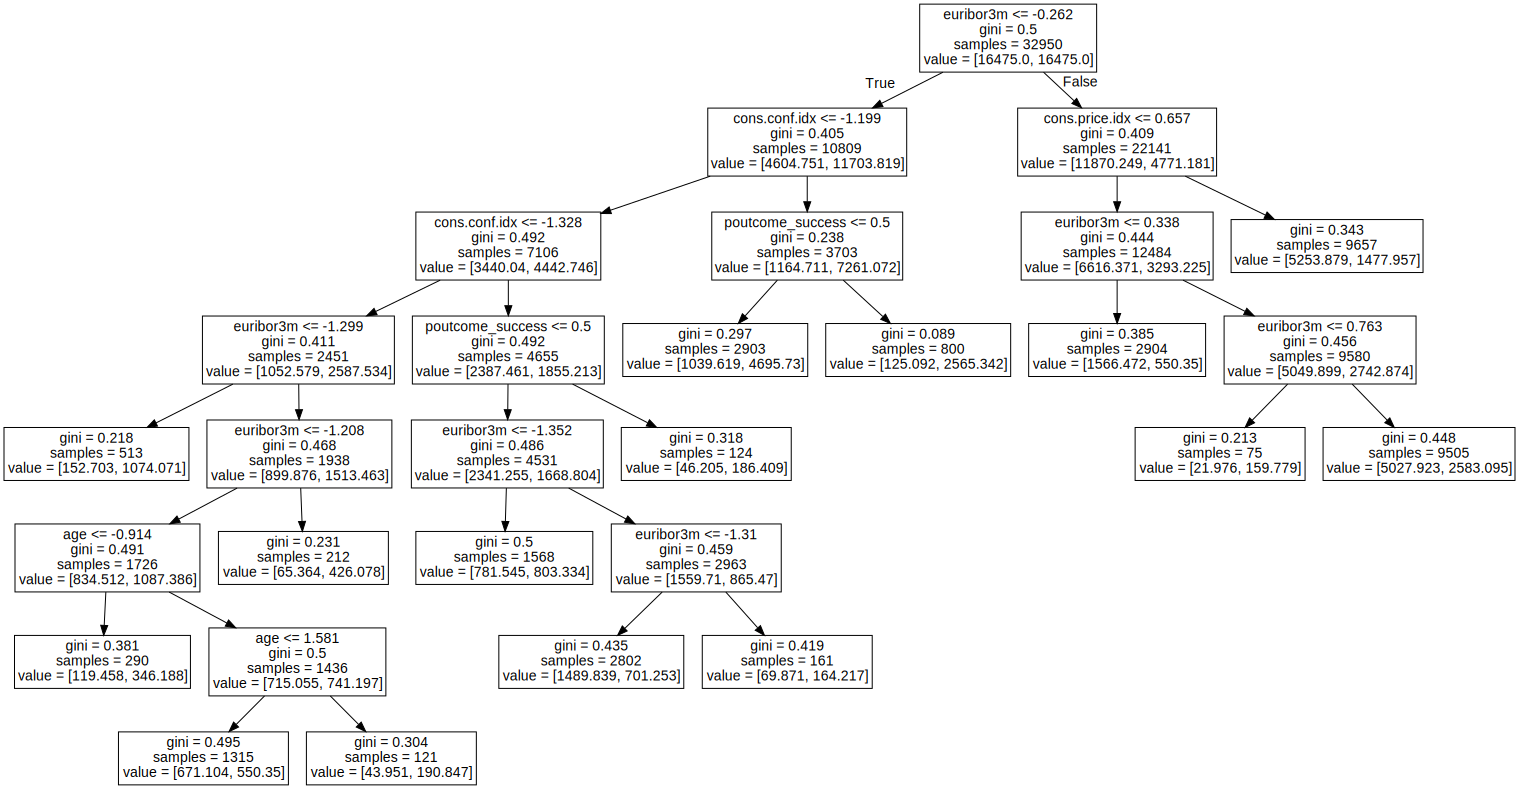

In [31]:
export_graphviz(best_model, out_file="mytree.dot", feature_names= labels)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Balanced Decision Tree

In [37]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.under_sampling import EditedNearestNeighbours

In [38]:
ros = RandomOverSampler(random_state=0)

In [39]:
x_resampled, y_resampled = ros.fit_resample(x, y)

In [40]:
df_prep_bal = prep.fit_transform(x_resampled)

In [41]:
x_bal = pd.DataFrame(df_prep_bal, columns=columns_prep)

In [42]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = model_selection.train_test_split(x_bal,y_resampled, test_size=0.2,
                                                    random_state=123,stratify= y_resampled)

In [43]:
scores = cross_val_score(model,x_train_bal, y_train_bal, cv=5, scoring='accuracy')

In [44]:
scores

array([0.92732558, 0.92637879, 0.92945703, 0.93005558, 0.92808893])

In [45]:
scores.mean()

0.9282611829742387

In [46]:
parameters = {
    'max_depth':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[300,500],
    'criterion':['gini']
}


parameters2 = {
"min_samples_split" : [300, 500],
"ccp_alpha" : [0.01, 0.001, 0.0001] }

In [47]:
search_obj = GridSearchCV(model, parameters2, cv=5, n_jobs=-1, scoring='f1_macro')
fit_obj = search_obj.fit(x_train_bal, y_train_bal)
print(fit_obj.cv_results_['mean_test_score'])

[0.71678282 0.71678282 0.73883158 0.73883158 0.75837043 0.75251015]


In [48]:
best_model_bal = fit_obj.best_estimator_
best_model_bal

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       min_samples_split=300)

In [49]:
scores_final = cross_val_score(best_model_bal,x_train_bal, y_train_bal, cv=5, scoring='f1_macro' )
scores_final.mean()

0.7583537054127604

In [50]:
best_model.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       min_samples_split=300)

In [51]:
metrics.accuracy_score(y_train_bal, best_model_bal.predict(x_train_bal))

0.7717867159176415

In [52]:
print( classification_report(y_train_bal, best_model_bal.predict(x_train_bal)) )

              precision    recall  f1-score   support

          no       0.75      0.82      0.78     29238
         yes       0.80      0.72      0.76     29238

    accuracy                           0.77     58476
   macro avg       0.77      0.77      0.77     58476
weighted avg       0.77      0.77      0.77     58476



In [53]:
print( classification_report(y_test_bal, best_model_bal.predict(x_test_bal)) )

              precision    recall  f1-score   support

          no       0.74      0.82      0.78      7310
         yes       0.79      0.71      0.75      7310

    accuracy                           0.76     14620
   macro avg       0.77      0.76      0.76     14620
weighted avg       0.77      0.76      0.76     14620



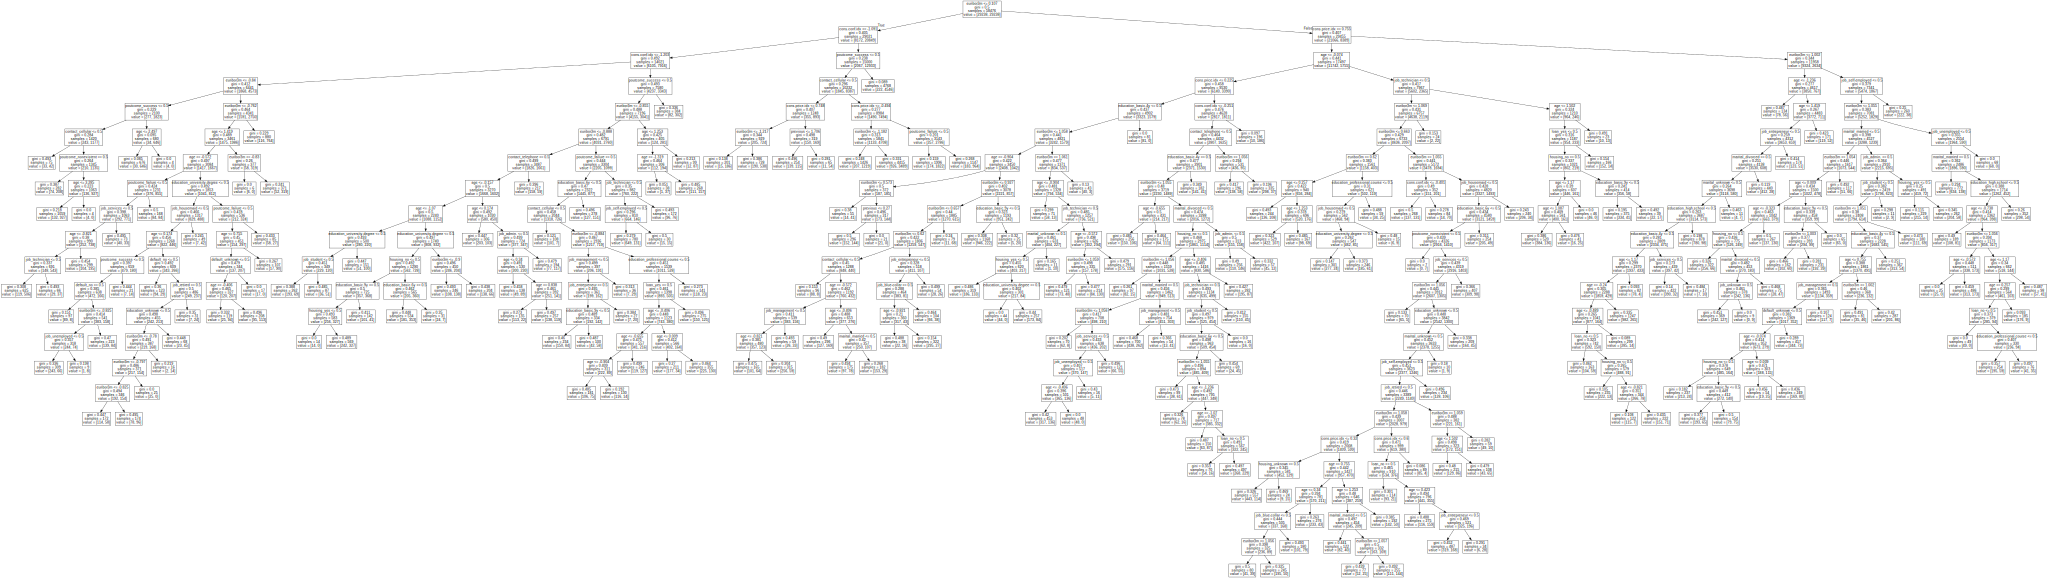

In [54]:
export_graphviz(best_model_bal, out_file="mytree.dot", feature_names= labels)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)